In [14]:
import pandas as pd
from matplotlib import pyplot as plt

In [89]:
df = pd.concat(
    [
        pd.read_csv("round-4-island-data-bottle/prices_round_4_day_1.csv", sep=';'),
        pd.read_csv("round-4-island-data-bottle/prices_round_4_day_2.csv", sep=';'),
        pd.read_csv("round-4-island-data-bottle/prices_round_4_day_3.csv", sep=';'),
    ],
    ignore_index=True
)

# With COCONUT price at $10000, COCONUT_COUPON price is $637.37
# COCONUT to COCONUT_COUPON ratio is 15.6894739319

<Axes: xlabel='day,timestamp'>

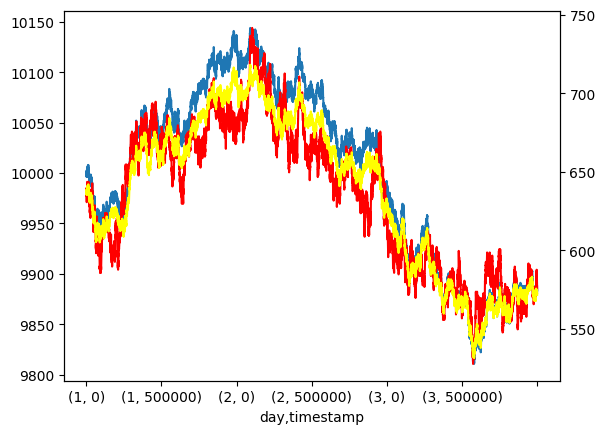

In [99]:
mid_price_df = df.pivot(index=['day', 'timestamp'], columns='product', values='mid_price')

mid_price_df['COCONUT_DIFF'] = mid_price_df['COCONUT'] - 10000
mid_price_df['EXPECTED_COCONUT_COUPON'] = (mid_price_df['COCONUT_DIFF'] * .56) + 637.37

price_factor = 15.6894739319 # (mid_price_df['COCONUT'] / mid_price_df['COCONUT_COUPON']).mean()
mid_price_df['COCONUT_PRICE_FACTOR'] = mid_price_df['COCONUT'] / price_factor

# window_size = 30000
# mid_price_df['COCONUT_VOL'] = mid_price_df['COCONUT'].pct_change().rolling(window_size, min_periods=1000).std()

fig, ax1 = plt.subplots()
mid_price_df['COCONUT'].plot(ax=ax1)

ax2 = ax1.twinx()
mid_price_df['COCONUT_COUPON'].plot(ax=ax2, color='red')
mid_price_df['EXPECTED_COCONUT_COUPON'].plot(ax=ax2, color='yellow')
# mid_price_df['COCONUT_PRICE_FACTOR'].plot(ax=ax2, color='orange')

# ax3 = ax1.twinx()
# mid_price_df['COCONUT_VOL'].plot(ax=ax3, color='green')




In [91]:
coconut_max = mid_price_df["COCONUT"].max()
coconut_min = mid_price_df["COCONUT"].min()
coconut_mean = mid_price_df["COCONUT"].mean()
coconut_std = mid_price_df["COCONUT"].std()

coconut_coupon_max = mid_price_df["COCONUT_COUPON"].max()
coconut_coupon_min = mid_price_df["COCONUT_COUPON"].min()
coconut_coupon_mean = mid_price_df["COCONUT_COUPON"].mean()
coconut_coupon_std = mid_price_df["COCONUT_COUPON"].std()

print(f"COCONUT max: {coconut_max}, min: {coconut_min}, mean: {coconut_mean}, std: {coconut_std}")
print(f"COCONUT_COUPON max: {coconut_coupon_max}, min: {coconut_coupon_min}, mean: {coconut_coupon_mean}, std: {coconut_coupon_std}")

print(f"range: {(coconut_max - coconut_min)/(coconut_coupon_max - coconut_coupon_min)}")

mid_price_df.corr()

COCONUT max: 10144.0, min: 9810.5, mean: 9999.900983333333, std: 88.75414439509082
COCONUT_COUPON max: 741.5, min: 527.5, mean: 635.0464333333333, std: 46.59395107902735
range: 1.558411214953271


product,COCONUT,COCONUT_COUPON,COCONUT_PRICE_FACTOR,COCONUT_VOL
product,,,,
COCONUT,1.000000,0.957869,1.000000,0.023270
COCONUT_COUPON,0.957869,1.000000,0.957869,0.020692
COCONUT_PRICE_FACTOR,1.000000,0.957869,1.000000,0.023270
COCONUT_VOL,0.023270,0.020692,0.023270,1.000000


In [100]:
from scipy.stats import norm
import numpy as np
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
def delta_calc(r, S, K, T, sigma, type="c"):

    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")



In [106]:
delta_calc(0, 9900, 10000, 0.984, 0.16)


(0.5063964429132697, 0.5063964429132697)

In [ ]:
def d1(S, K, t, r, sigma):  # see Hull, page 292
    """Calculate the d1 component of the Black-Scholes PDE.

    :param S: underlying asset price
    :type S: float
    :param K: strike price
    :type K: float
    :param sigma: annualized standard deviation, or volatility
    :type sigma: float
    :param t: time to expiration in years
    :type t: float
    :param r: risk-free interest rate
    :type r: float

    John C. Hull, "Options, Futures and Other Derivatives,"
    7th edition, Example 13.6, page 294

    >>> S = 42
    >>> K = 40
    >>> r = .10
    >>> sigma = .20
    >>> t = 0.5
    >>> calculated_d1 = d1(S,K,t,r,sigma)
    >>> text_book_d1 = 0.7693
    >>> abs(calculated_d1 - text_book_d1) < 0.0001
    True
    """

    sigma_squared = sigma * sigma
    numerator = np.log(S / float(K)) + (r + sigma_squared / 2.) * t
    denominator = sigma * np.sqrt(t)

    if not denominator:
        print ('')
    return numerator / denominator

In [ ]:
from math import fabs, sqrt, exp

def norm_pdf(x):
    return ONE_OVER_SQRT_TWO_PI * exp(-.5 * x * x)

norm_cdf_asymptotic_expansion_first_threshold = -10.0
norm_cdf_asymptotic_expansion_second_threshold = -1 / sqrt(DBL_EPSILON)
def norm_cdf(z):
    if z <= norm_cdf_asymptotic_expansion_first_threshold:
        # Asymptotic expansion for very negative z following (26.2.12) on page 408
        # in M. Abramowitz and A. Stegun, Pocketbook of Mathematical Functions, ISBN 3-87144818-4.
        sum = 1
        if z >= norm_cdf_asymptotic_expansion_second_threshold:
            zsqr = z * z
            i = 1
            g = 1
            x = 0
            y = 0
            a = DBL_MAX

            lasta = a
            x = (4 * i - 3) / zsqr
            y = x * ((4 * i - 1) / zsqr)
            a = g * (x - y)
            sum -= a
            g *= y
            i += 1
            a = fabs(a)
            while lasta > a >= fabs(sum * DBL_EPSILON):
                lasta = a
                x = (4 * i - 3) / zsqr
                y = x * ((4 * i - 1) / zsqr)
                a = g * (x - y)
                sum -= a
                g *= y
                i += 1
                a = fabs(a)
        return -norm_pdf(z) * sum / z
    return 0.5 * erfc_cody(-z * ONE_OVER_SQRT_TWO)

In [ ]:
def delta(flag, S, K, t, r, sigma):
    """Return Black-Scholes delta of an option.
    
    :param S: underlying asset price
    :type S: float
    :param K: strike price
    :type K: float
    :param sigma: annualized standard deviation, or volatility
    :type sigma: float
    :param t: time to expiration in years
    :type t: float
    :param r: risk-free interest rate
    :type r: float
    :param flag: 'c' or 'p' for call or put.
    :type flag: str      

    Example 17.1, page 355, Hull:
    
    >>> S = 49
    >>> K = 50 
    >>> r = .05
    >>> t = 0.3846
    >>> sigma = 0.2
    >>> flag = 'c'
    >>> delta_calc = delta(flag, S, K, t, r, sigma)
    >>> # 0.521601633972
    >>> delta_text_book = 0.522
    >>> abs(delta_calc - delta_text_book) < .01
    True
    """

    d_1 = d1(S, K, t, r, sigma)

    if flag == 'p':
        return N(d_1) - 1.0
    else:
        return N(d_1)